<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/Pytorch(ANN_Deeplearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from my_custom_utils import data_preparation,important_features_visualization_classifier,feature_selection_classifier

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
sns.set(rc={
    'figure.figsize':(20, 15)
})

# Loading the Data

In [ ]:

df=pd.read_csv('Copy of Depression and Happiness Factor Analysis.csv')
df.shape

(920, 21)

# Data Preparation

* Preparing the data using the imported `data_preparation()` function.
```Python
    def data_preparation(data):
  """This funtion is for data preparation which returns the clean data. In order to do this, it drops the unnecessay columns and sets the index. 
  Then it encodes the categorical non-numeric data into numeric data using label encoder.
  Input:
      data: The dataframe.
  
  Output:
      Concatenation of encoded and numeric data.
  """
  data=data.drop(['Timestamp','Unnamed: 20'],axis=1)
  data=data.set_index('Which year are you in?')
  data_numeric=data.drop(data.iloc[:, [0,2,4,5,6,8,9,10,11,12,13,14,15,16]],axis=1)
  data_non_numeric=data.drop(data.iloc[:, [1,3,7,17]],axis=1)
  le=LabelEncoder()
  encode=data_non_numeric.apply(le.fit_transform)

  return pd.concat([encode,data_numeric],axis=1)
```

In [ ]:
data_final=data_preparation(df)
data_final.shape

(920, 18)

# Feature Selection

* Visualizing the important features using the imported `important_features_visualization_classifier()` function.
```Python
def important_features_visualization_classifier(data):
  """This function plots the importance features using mutual information classifier.
  Input:
      data: The dataframe.
  
  Output:
      Plots a horizontal bar chart of the important features in a descending order.
  """
  X=data.drop('How are you feeling right now?',axis=1)
  y=data['How are you feeling right now?']
  imp=mutual_info_classif(X,y)
  feat_imp=pd.Series(imp,data.columns[0:len(data.columns)-1])
  feat_imp.sort_values(ascending=False).plot(kind='barh',color='teal',figsize=(20,10))
  plt.show()
```

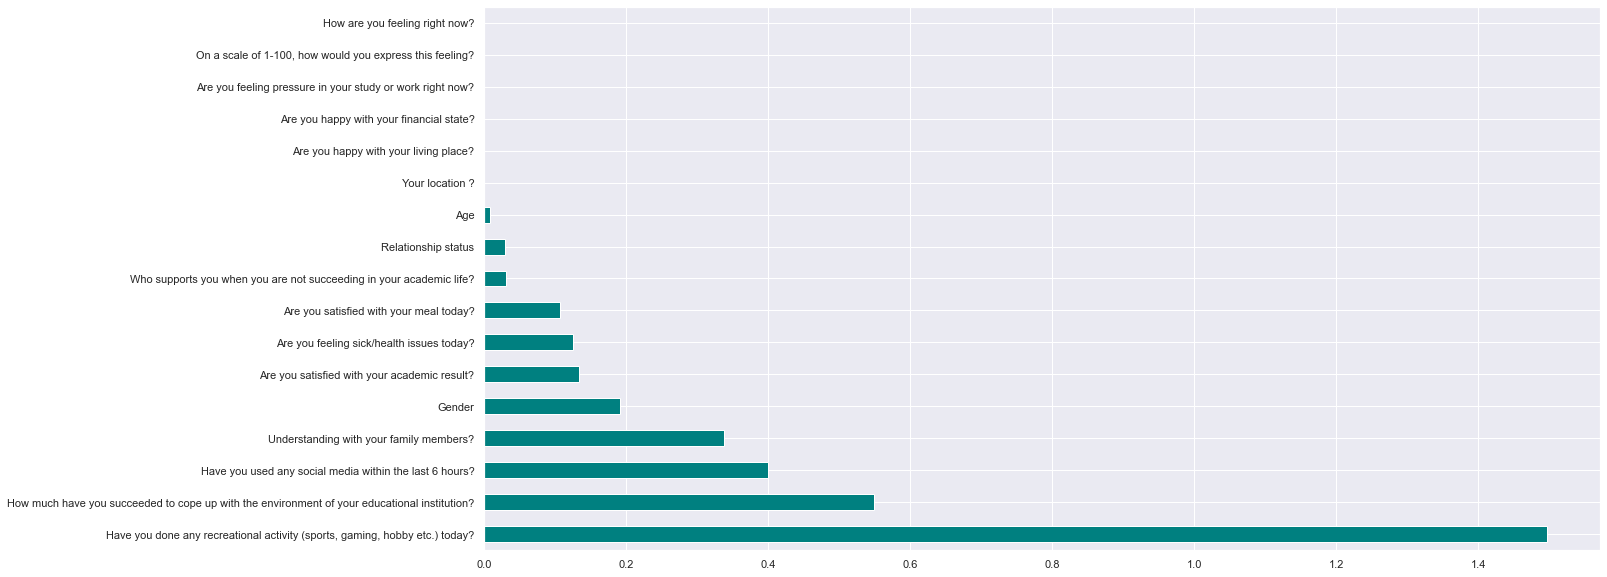

In [ ]:
imp_feat_vis=important_features_visualization_classifier(data_final)
imp_feat_vis

* Finding the important features using the imported `feature_selection_classifier()` function.
```Python
def feature_selection_classifier(data):
  """This function finds the important features using mutual information classifier under a percentile value.
  Input:
      data: The dataframe.
  
  Output:
      Returns the top important features under 30 percentiles.
  """
  X=data.drop('How are you feeling right now?',axis=1)
  y=data['How are you feeling right now?']
  select=SelectPercentile(mutual_info_classif,percentile=30)
  select.fit(X,y)

  return X.columns[select.get_support()]
```

In [ ]:
important_features=feature_selection_classifier(data_final)
important_features

Index(['Your location ?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your meal today?',
       'On a scale of 1-100, how would you express this feeling?',
       'How long did you sleep last night?(in hours)'],
      dtype='object')

# Splitting the Data

In [ ]:
X_new=data_final[['Your location ?','Are you feeling pressure in your study or work right now?','Are you satisfied with your meal today?','On a scale of 1-100, how would you express this feeling?','How long did you sleep last night?(in hours)']].values
y_new=data_final['How are you feeling right now?'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.20,stratify=y_new,random_state=21)

# Building the Artificial Neural Network Model

### <span style='color:red'>***Using Pytorch without GPU's***</span>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

### <span style='color:red'>***Creating ANN Class with Layers and Forward Propagation***</span>

In [ ]:
class ANN(nn.Module):
    def __init__(self,input_features=5,hidden1=20,hidden2=20,out_features=5):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self, x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [ ]:
torch.manual_seed(20)
model=ANN()

In [ ]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',


In [ ]:
model.parameters

<bound method Module.parameters of ANN(
  (f_connected1): Linear(in_features=5, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=5, bias=True)
)>

In [ ]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

### <span style='color:red'>***Training and Testing***</span>

In [ ]:
epochs=500
train_losses=[]
test_losses=[]
for i in range(epochs):
    i=i+1
    #train
    y_pred_train=model.forward(X_train)
    loss_train=loss_function(y_pred_train,y_train)
    train_losses.append(loss_train)
    
    #test
    y_pred_test=model.forward(X_test)
    loss_test=loss_function(y_pred_test,y_test)
    test_losses.append(loss_test)
    if i%10==0:
        print("Epoch number: {}".format(i))
        print("The training loss : {}".format(loss_train.item()))
        print("The testing loss : {}".format(loss_test.item()))
        print("\n")
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

Epoch number: 10
The training loss : 1.3954905271530151
The testing loss : 1.4012243747711182


Epoch number: 20
The training loss : 1.1661385297775269
The testing loss : 1.1568797826766968


Epoch number: 30
The training loss : 1.0395511388778687
The testing loss : 1.0158568620681763


Epoch number: 40
The training loss : 0.9467398524284363
The testing loss : 0.9247807860374451


Epoch number: 50
The training loss : 0.7984837293624878
The testing loss : 0.784808337688446


Epoch number: 60
The training loss : 0.6126570701599121
The testing loss : 0.6038478016853333


Epoch number: 70
The training loss : 0.4738084077835083
The testing loss : 0.46156880259513855


Epoch number: 80
The training loss : 0.40354079008102417
The testing loss : 0.3962932229042053


Epoch number: 90
The training loss : 0.3709051012992859
The testing loss : 0.37321737408638


Epoch number: 100
The training loss : 0.34922897815704346
The testing loss : 0.3661634922027588


Epoch number: 110
The training loss : 0

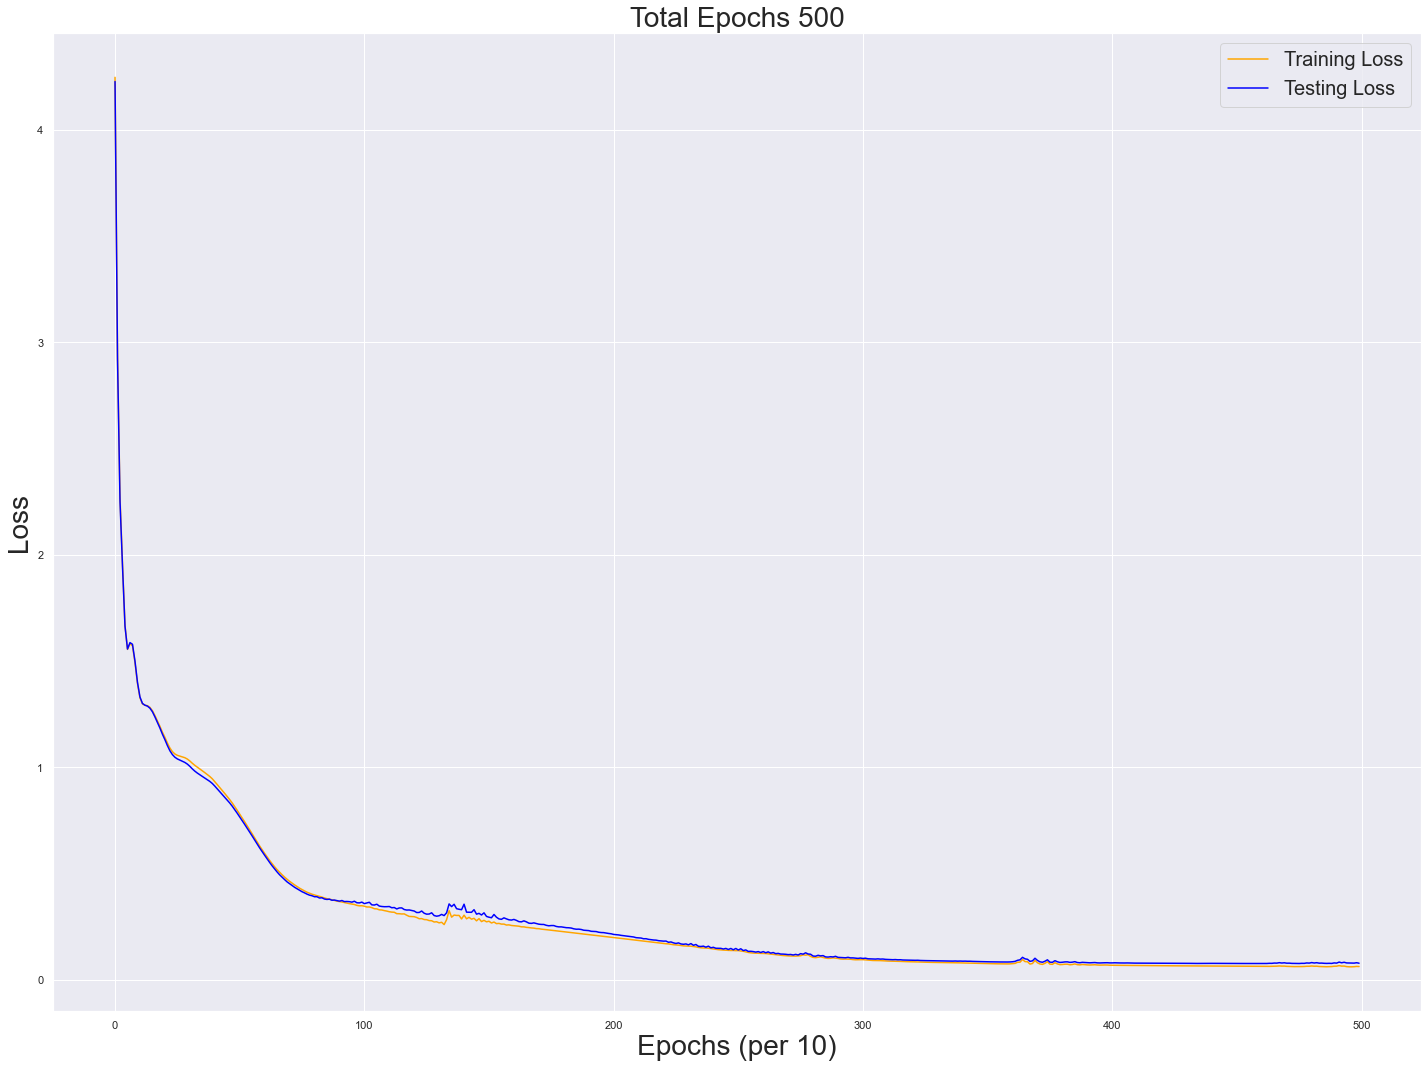

In [ ]:
plt.plot(range(epochs), train_losses, color='orange', label="Training Loss")
plt.plot(range(epochs), test_losses, color='blue', label="Testing Loss")
plt.ylabel('Loss', fontsize=28)
plt.xlabel('Epochs (per 10)', fontsize=28)
plt.title('Total Epochs '+str(epochs), fontsize=28)
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.show();

### <span style='color:red'>***Making Predictions***</span>

In [ ]:
predictions=[]
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

3
4
2
2
3
2
2
4
4
3
1
3
2
0
3
2
2
0
2
3
3
1
4
1
2
1
2
4
1
2
4
4
1
2
2
4
0
2
0
2
4
1
0
1
1
2
1
0
4
1
4
1
4
4
0
1
1
2
4
3
1
0
2
0
3
1
0
0
1
0
3
2
4
3
4
1
1
0
0
1
1
3
0
4
2
0
2
1
0
4
3
3
4
1
3
2
0
3
0
2
3
1
1
3
3
4
4
4
1
4
4
1
3
3
4
4
2
4
2
0
4
1
0
4
0
4
1
4
3
0
0
1
4
4
3
1
3
1
4
3
2
4
4
3
0
1
0
0
0
4
0
1
1
2
1
1
4
2
4
0
3
1
3
3
3
4
2
2
2
2
4
1
1
0
0
3
4
1
4
3
0
1
2
3


### <span style='color:red'>***Model Evaluation***</span>

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, predictions)

0.9836956521739131

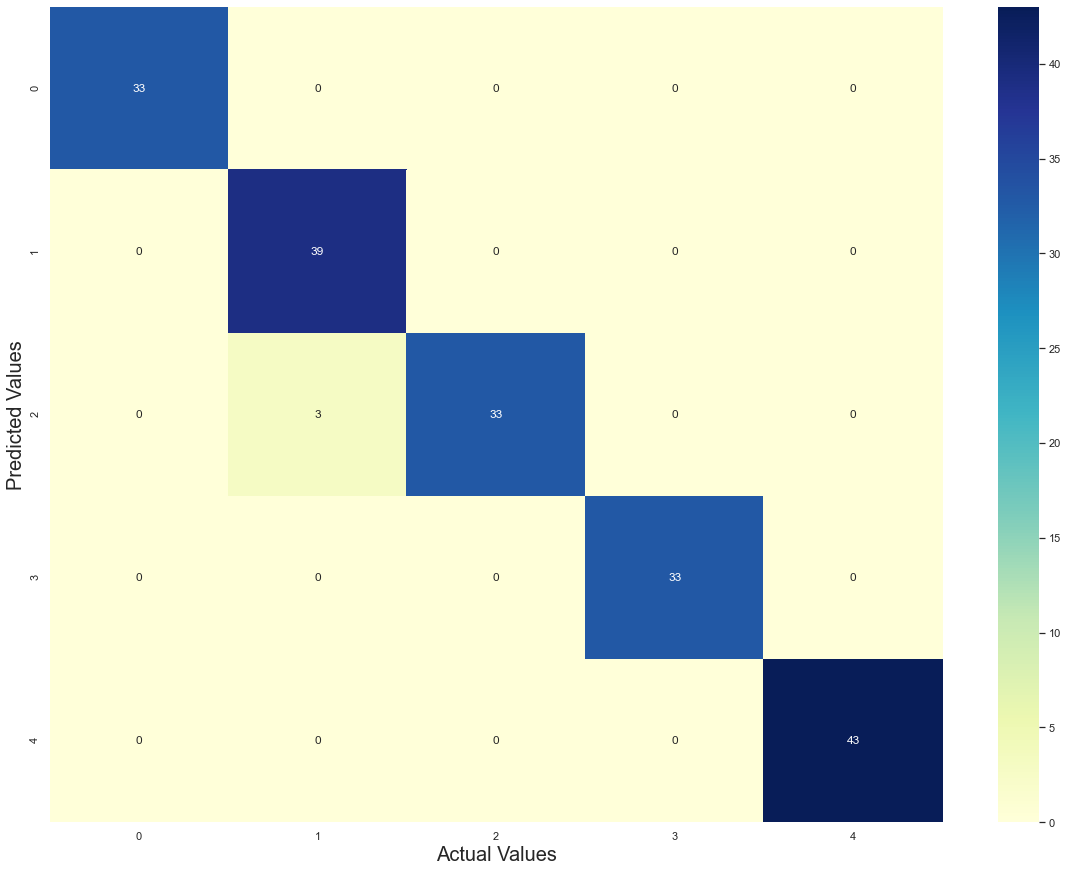

In [ ]:
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Actual Values', fontsize=20)
plt.ylabel('Predicted Values', fontsize=20)
plt.show();

In [ ]:
target_names=['Very Bad','Bad','Normal','Good','Very Good']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

    Very Bad       1.00      1.00      1.00        33
         Bad       0.93      1.00      0.96        39
      Normal       1.00      0.92      0.96        36
        Good       1.00      1.00      1.00        33
   Very Good       1.00      1.00      1.00        43

    accuracy                           0.98       184
   macro avg       0.99      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



In [ ]:
#torch.save(model, 'ml_lab_pytorch.pt')